In [1]:
import torch
import torchvision.transforms as T
from torchvision.transforms import ToTensor
from utils.dataset import RealColonDataset
from utils.transformations import CustomTransform
from utils.helpers import set_random_seed

In [2]:
# Set a global random seed here.
GLOBAL_SEED = 42
set_random_seed(GLOBAL_SEED)

train_transform = T.Compose([
    CustomTransform(pad_method="zeros", max_size=(1352,1080), target_size=(224,224), augment=True),
    ToTensor()
])

test_transform = T.Compose([
    CustomTransform(pad_method="zeros", max_size=(1352,1080), target_size=(224,224), augment=False),
    ToTensor()
])

In [3]:
data_dir = "/radraid/dongwoolee/real_colon_data"
train_csv = "/radraid2/dongwoolee/Colon/data/frames_train.csv"
test_csv = "/radraid2/dongwoolee/Colon/data/frames_test.csv"

train_dataset = RealColonDataset(data_dir=data_dir, 
                                 frames_csv=train_csv, 
                                 num_imgs=80000, 
                                 pos_ratio=0.5, 
                                 min_skip_frames=5, 
                                 apply_skip=True, 
                                 transform=train_transform)

test_dataset = RealColonDataset(data_dir=data_dir, 
                                 frames_csv=test_csv, 
                                 num_imgs=20000, 
                                 pos_ratio=0.5, 
                                 min_skip_frames=5, 
                                 apply_skip=True, 
                                 transform=test_transform)

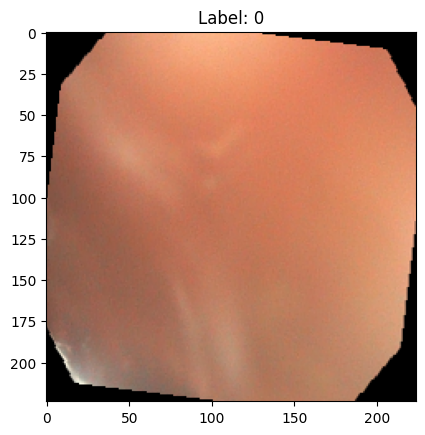

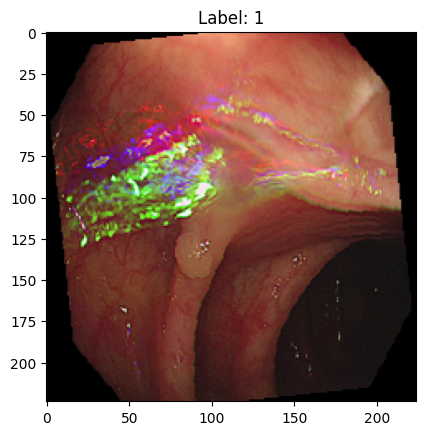

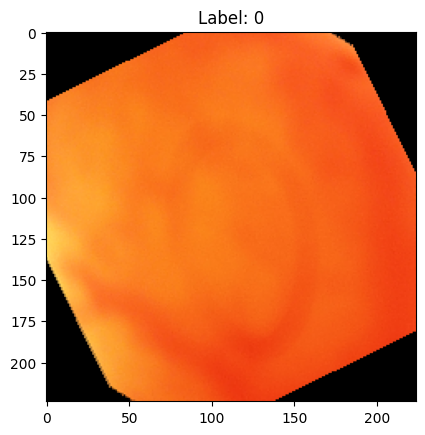

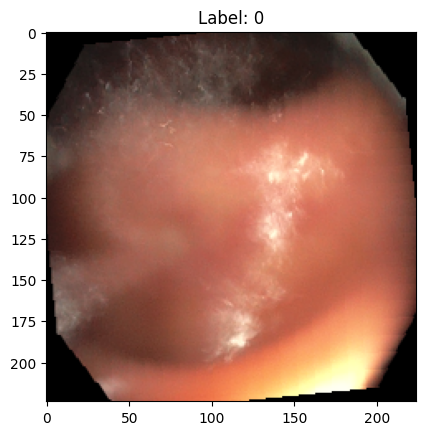

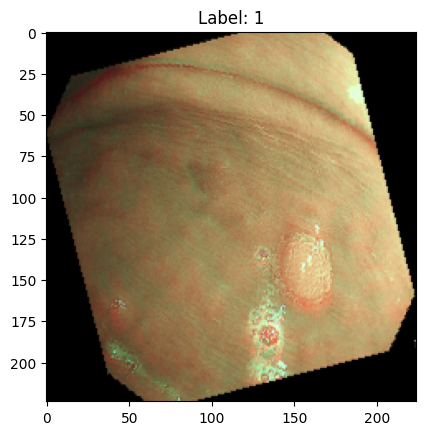

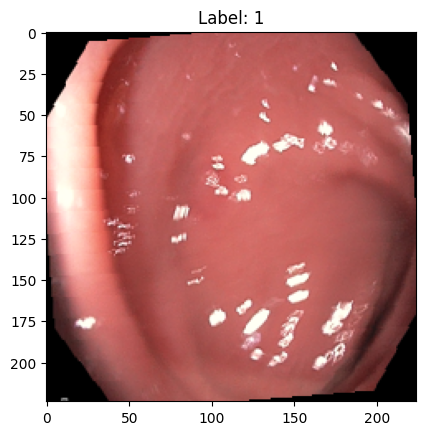

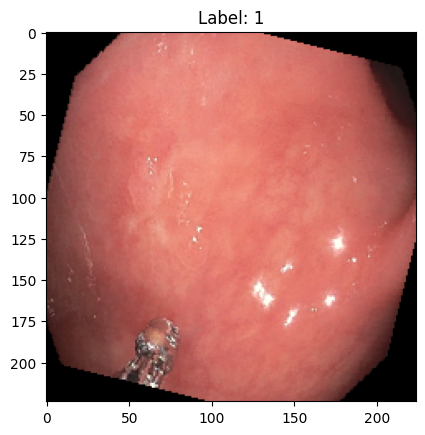

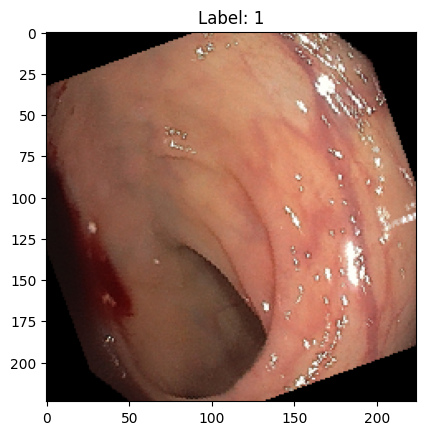

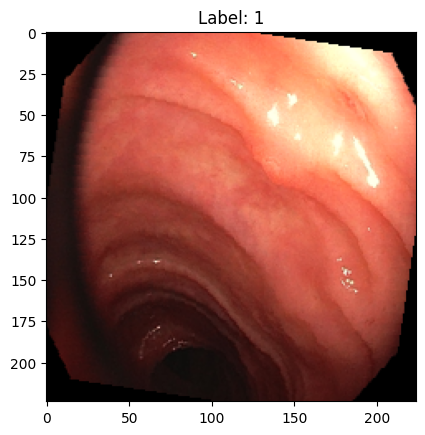

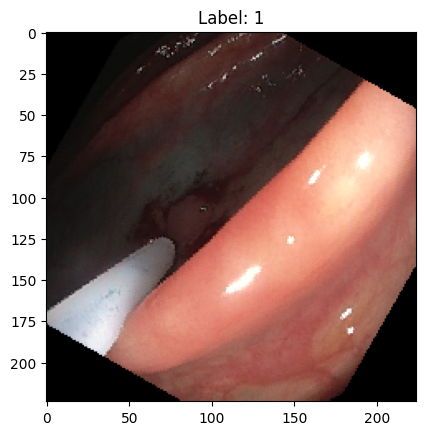

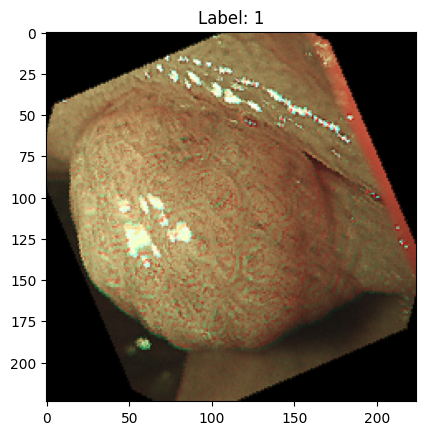

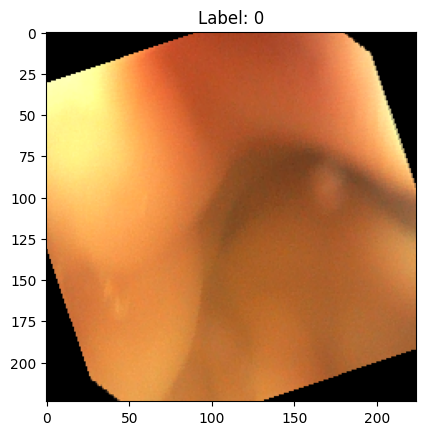

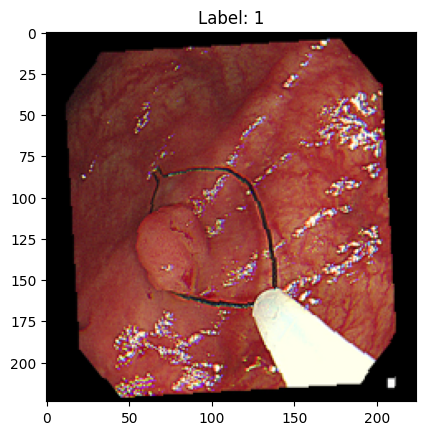

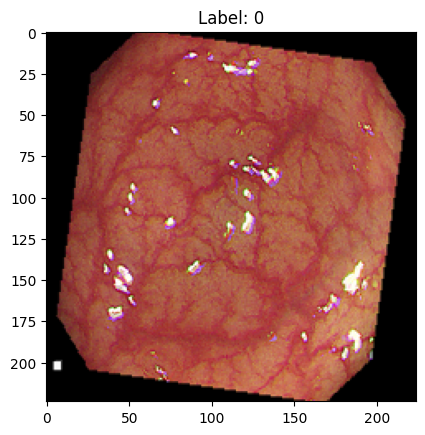

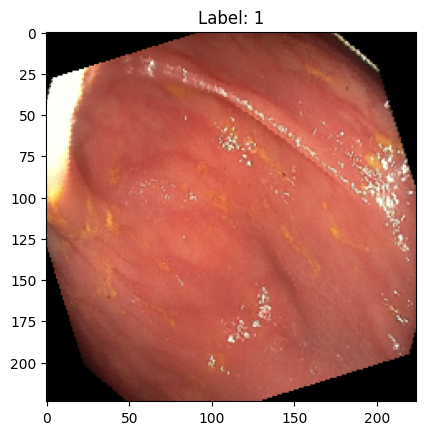

In [4]:
import matplotlib.pyplot as plt

for i in range(15):
    image, label = train_dataset[i]
    image = image.permute(1,2,0).numpy()
    plt.title(f"Label: {label}")
    plt.imshow(image)
    plt.show()

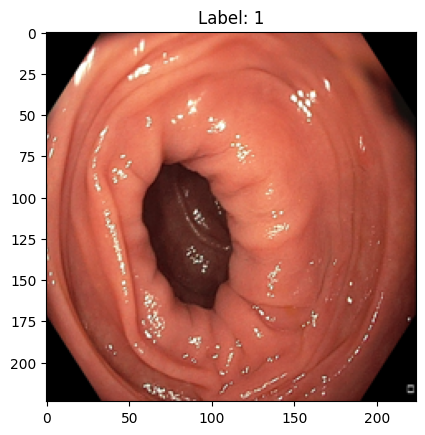

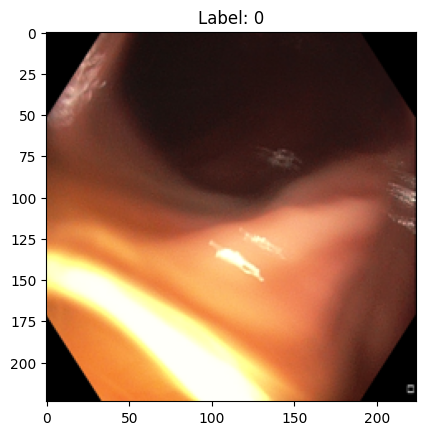

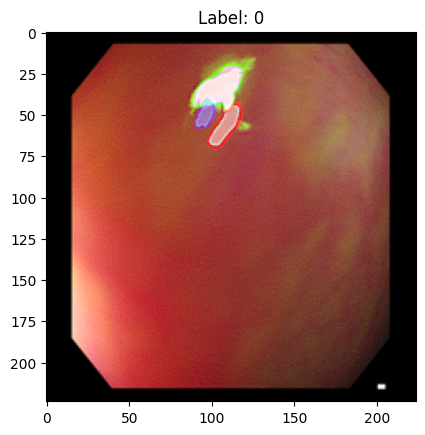

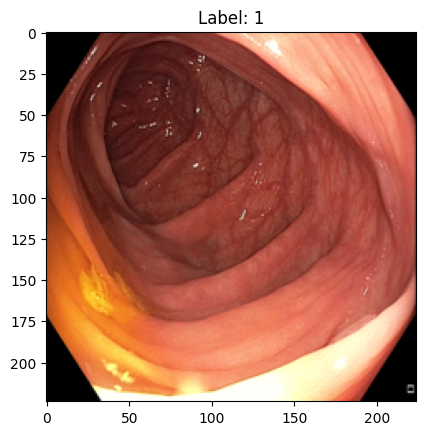

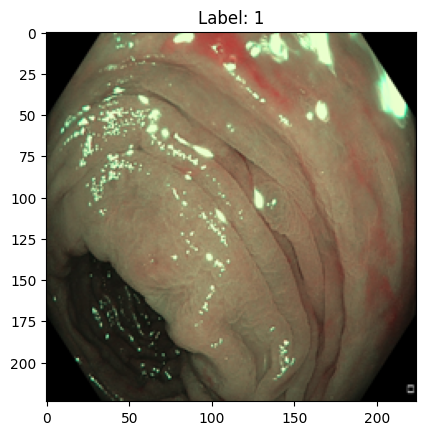

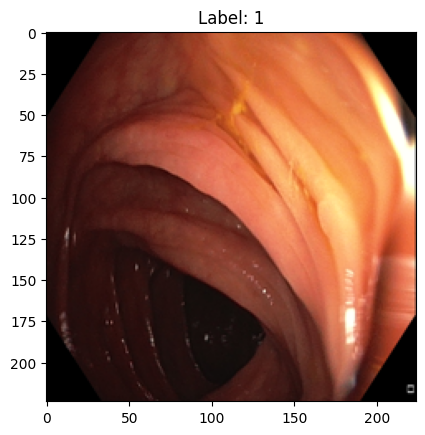

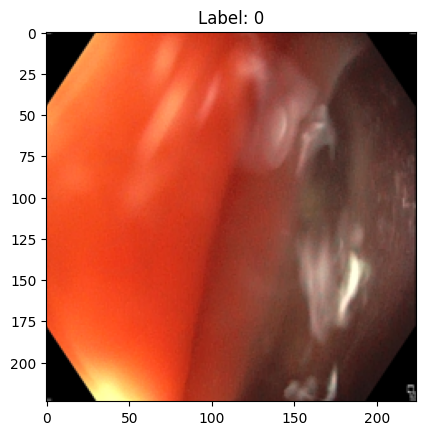

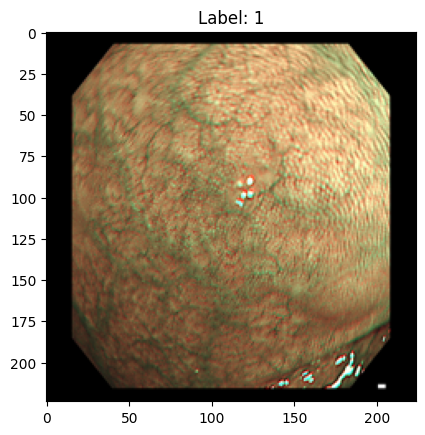

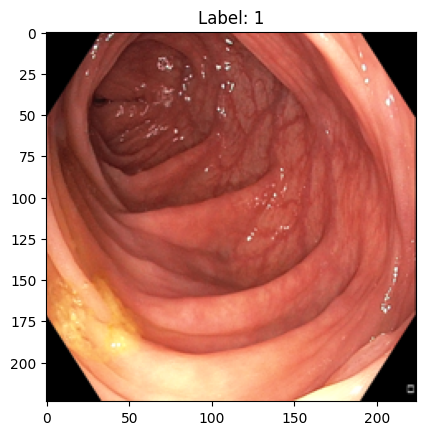

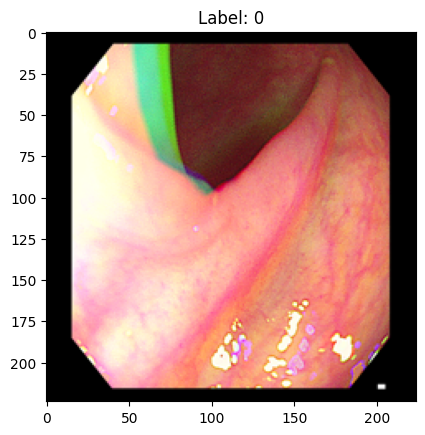

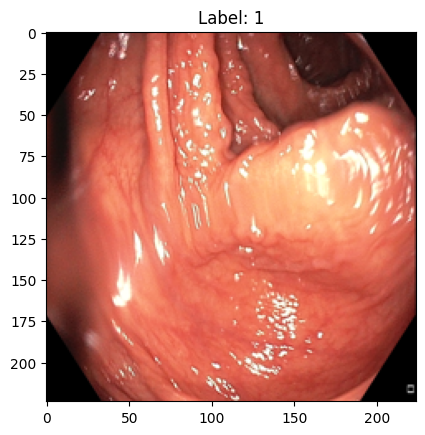

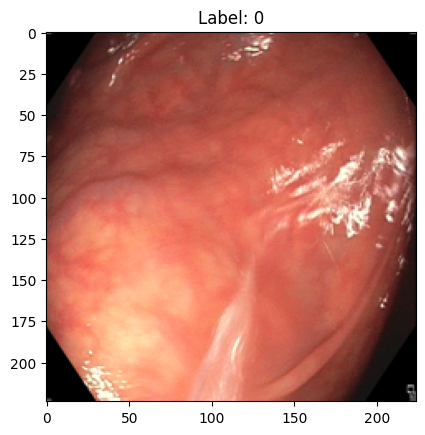

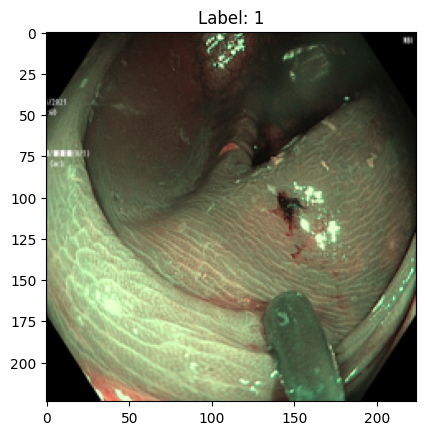

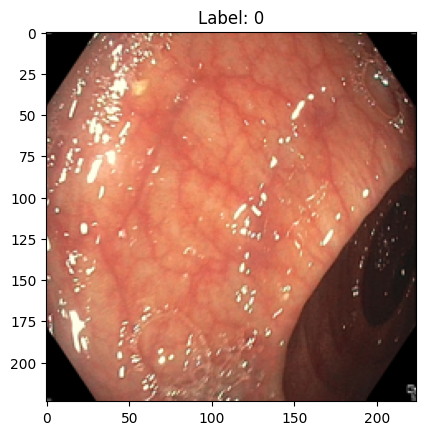

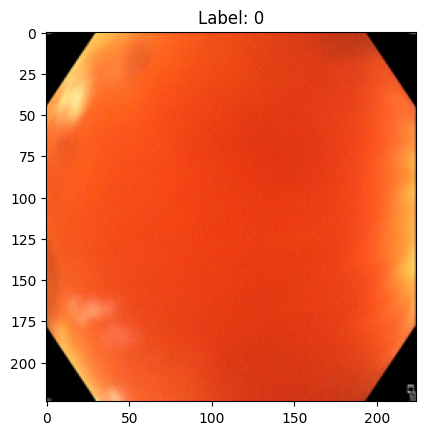

In [5]:
for i in range(15):
    image, label = test_dataset[i]
    image = image.permute(1,2,0).numpy()
    plt.title(f"Label: {label}")
    plt.imshow(image)
    plt.show()